# Projekt 5 - Kalibrált szerelemmérő

Most már rendelkezünk egy szerelem mérő eszközzel, ami furfangos módon egy termisztor ellenállásának hőre való változásából a rajta eső feszültséget méri. Ezt még leírni is körülményes. Sőt beállítani a megfelelő feszültségparamétereket is az. Ezért jobb lenne, ha igazából a mért feszültséget át tudnánk számolni hőmérsékletté. Evvel a módszerrel az alanyunktól származó hőt mérnénk valamilyen formában. Mivel tudjuk, hogy az emberi test hőmérséklete ideális esetben 36 Celsius fok körül van, így könnyebb lesz feltételek szabni a LED-ek vezérlésére. 

## Mit fogsz készíteni?

Egy NTCC 10k nevű thermisztorból, egy MCP3008 ADC-ből, egy 10 kOhm ellenállásból és 3 LED-ből álló áramkört fogsz összerakni egy feszültségosztó elrendezésben. Ebben a projektben még csak a feszültség változását mérjük a hőmérséklet hatására. Annak függvényében, hogy mekkora a feszültség:

* T < 25 $^\circ$C - nem világít egyik LED sem
* 25 $^\circ$C $\geq$ T < 28 $^\circ$C - zöld LED világít
* 28 V $\leq$ T < 32 $^\circ$C - zöld és sárga LED-ek világítanak
* T $\geq$ 32 $^\circ$C - mind a három LED világít.

## Mit tanulsz meg?

A hőmérő szenzor elkészítésével a következőket tanulod meg:

* Hogyan kommunikáljunk egy ADC-vel.
* Hogyan használjunk LED-eket.
* Hogyan használjunk ```if - else``` szerkezetet.
* Hogyan kell fájlokat beolvasni az ```open``` használatával.
* Hogyan importálunk egy függvényt egy fájból amit mi írtunk.
* Hogyan interpolálunk ismeretlen értékekre. 
* Hogyan számoljuk a thermisztor ellenállását egy feszültségosztóval.

## A projekt részletekre bontása

* Elkészíteni az áramkört.
* Importálni az MCP3008, LED objektumokat, ```numpy``` csomagot, függvényt az interpolálásra és fájl beolvasó függvényt.
* Inicializálni a LED-eket és az ADC-t.
* Definiálni egy függvényt, ami egy megadott fájlból kinyeri a thermisztor hőmérséklet-ellenállás függését. 
* Definiálunk egy függvényt ami a mért feszültséget átalakítja ellenállássá a feszültségosztó elve alapján.
* Definiálunk egy függvényt, hogy a hőmérséklet-ellenállás függés ismeretlen pontjait interpoláljuk.
* Definiálunk egy függvényt a LED-ek vezérlésére.
* Beolvassuk a hőmérséklet-ellenállás függését, a fent definiált függvénnyel.
* Egy végtelen ```while``` ciklusban mérjük a feszültséget, kiszámoljuk az ellenállás változást, abból az aktuális hőmérsékletet, és a hőmérséklet alapján pedig vezéreljük a LED-eket.

## Áramköri elemek listája

a) [Raspberry PI](https://malnapc.hu/yis/raspberry-pi/rpi-panelek) 

b) NTCC 10k szenzor: [itt vásárolhatsz](https://www.tme.eu/hu/details/ntcc-10k/tht-ntc-merotermisztorok/sr-passives/)

c) [Jumper wires female/male](https://www.ret.hu/shop/product/e-call/jumper-vezetek-szet_53-22-63) 

d) Ellenállás: [itt vásárolhatsz](https://www.tme.eu/hu/katalog/metal-film-tht-ellenallasok_112313/?s_order=desc&search=ellenallas&s_field=1000011)

e) MCP3008 I/P ADC: [itt vásárolhatsz](https://www.tme.eu/hu/details/mcp3008-i_p/a-d-konverterek-ic-k/microchip-technology/)

f) 3db LED (piros, sárga, zöld), $I_{max}$ = 20 mA-es: [itt vásárolhatsz](https://www.tme.eu/hu/katalog/tht-led-diodak-5mm_112898/?s_order=desc&search=led&s_field=1000011)

## A kapcsolási rajz

<img src="schema/prog04_schema.png" width=800 height=600 />

A fenti ábrához hasonlóan kapcsoljuk össze az áramköri elemeket és a Raspberry Pi-t. Az áramkör részletes összekötési magyarázata a [Thermisztorok]() című bevezető leírásban található. **N.B. Ha nem a lent megadott módon kötjük be az ADC-t, akkor figyelni kell arra, hogy a szoftverben a lábak definiálásánál ezt jelezni kell, illetve tudunk kell, hogy akkor nem hardwares SPI kommunikáció lesz.**

0) Kössük sorba a NTCC 10k thermisztort és a 10 kOhm ellenállást. A thermisztor üres lábára kapcsoljuk a Raspberry Pi 3.3 V-os tápját, míg az ellenállás üres lábára a földelést. A thermisztor és az ellenállás csatlakozását pedig kössük az MCP3008 CH7-es csatornájára.

1) Kössük össze a Raspberry Pi egyik földelését az MCP3008 AGND ás DGND lábaival (fekete drót).

2) Kössük az MCP3008 *VDD* és *VREF* nevű lábait a Raspberry Pi 3.3 V-os tüskéjére. 

3) Kössük az MCP3008 *CLK* nevű lábát a Raspberry Pi *GPIO11* tüskéjére. 

4) Kössük az MCP3008 *DOUT* nevű lábát a Raspberry Pi *GPIO09* tüskéjére. 

5) Kössük az MCP3008 *DIN* nevű lábát a Raspberry Pi *GPIO10* tüskéjére.

6) Kössük az MCP3008 *CS* nevű lábát a Raspberry Pi *GPIO08* tüskéjére.

7) Helyezzük a piros LED lábait két különboző sorba. A katódjának (negatív láb) sorába kössük be az ellenállásunk egyik lábát, míg a másikat kössük a földelésre. Az ellenállás másik lábát kössük a földelésre.

8) Ismételjük meg a fenti lépést még kétszer a sárga és a zöld LED-re is, a kapcsolási rajzhoz hasonlóan.

9) A piros LED szabadon levő lábát egy jumperrel kössük össze a *GPIO21*-es tüskével, a sárgát a *GPIO20*-sel a zöldet pedig a *GPIO16*-sel.

## A kód

Nyissunk meg egy új python fájlt és mentsük el pl. ```ds18b20_temperature_led_calibrated.py``` név alatt. A ```gpiozero``` csomagnak nincs beépített objektuma ami általánosan a thermisztorokkat tudná kezelni, így minden egyes thermisztorhoz nekünk kell megoldani a szoftveres kommunikációt az adott eszközzel.

### A thermisztor tesztelése

Miután elkészítettük az áramkört, meg kell írnunk a kódot ami utasítja a Raspberry Pi-t, a hőmérséklet kiolvasására.

Mivel a thermisztor analóg jelet ad ki, amit a Raspberry Pi nem tud értelmezni, közbe iktatünk egy analóg digitális átalakítót, MCP3008. Ez a chip SPI protokolon keresztül kommunikál és a ```gpiozero``` csomagnak van hozzá objektuma, amit a ```LED``` klasszokkal együtt beimportálunk. 

A konvertert először inicializáljuk (a dokumentációban több példa is szerepel, hogy miképp lehet azt megtenni). Bemenő paraméterként megadjuk, hogy a thermisztoros feszültségosztóból kiolvasott feszültséget a 7-es csatornára csatlakoztattuk. Teszteléshez elég meghívni az objektum ```voltage``` metódusát, amit kiírathatunk a képernyőre.

```ds18b20_temperature_led_calibrated.py```:

In [2]:
from gpiozero import MCP3008, LED

mcp = MCP3008(channel=7)

while True:
	print(mcp.voltage)              

### LED-ek tesztelése

Az objektum beolvasása után inicializálunk egy ```LED``` objektumot, amit ```red```-nek, ```yellow```-nak és ```green```-nek nevezünk el. Egyben megmondjuk a LED-eknek, hogy a *21*-es, *20*-as és *16*-os számú **GPIO** tüskére kötöttük. Egy listába gyűjtjük őket és a listán lépegetve kapcsoljuk be és ki egyenként a LED-eket.

```ds18b20_temperature_led_calibrated.py```:

In [ ]:
from gpiozero import MCP3008, LED

mcp = MCP3008(channel=7)
red = LED(21)
yellow = LED(20)
green = LED(16)

leds = [red, yellow, green]

for led in leds:
    led.on()
    
for led in leds:
    led.off()

### Függvények importálása modulokból

Pythonban modulnak nevezzük azokat a fájlokat amik Python kódot tartalmaznak, pl. függvényeket, globális változókat, klasszokat stb. Ezek a fájlok ```.py``` kiterjesztéssel kell rendelkezzenek. 

Csomagnak (package) nevezzük azon mappákat, amikben modulok gyűjteménye van. Ilyen csomag pl. az általunk gyaktran használt ```gpiozero```. 

Modulokat főleg arra használjuk, hogy kisebb egységekre bontsunk terebélyesebb kódokat, illetve fontos szerepet játszanak még a különböző kódrészletek újrahasznosításában. Ez utóbbi tulajdonságot használjuk ki mi is, hiszen egy olyan függvényt fogunk beimportálni egy fájlból (modulból), amit ezek előtt rengetegszer használtunk, de minden egyes alkalommal a kódunkban definiáltuk. 

Ebben a projektben is egy fájl tartalmát szeretnénk pythonba beolvasni, így a ```read_temp_raw``` függvényt átmásoltuk egy fájlba, aminek a neve ```temperature_functions.py```:

```temperature_functions.py```:

In [16]:
def read_temp_raw(file_name):
    f = open(file_name, 'r')
    lines = f.readlines()
    f.close()
    return lines

A függvény modulból való beimportálásához szükség, hogy az adott fájl amin dolgozunk, ugyanabban a mappában legyen, ahol a modul van elmentve. Amennyiben ez nem teljesül, akkor a python megnézi, hogy milyen helyek/útvonalak vannak definiálva a ```sys.path``` listában és azokon a helyeken kezdi keresni az általunk megadott modul nevet.

A modul importálás ugyanúgy működik, mint bármi más importálás. Mi pl. a modulból (```from```) egy függvényt fogunk importálni:

In [ ]:
from temperature_functions import read_temp_raw

Vegyük észre, hogy a modul nevében nincs benne a .py kiterjesztés az importáláskor, csak a modul nevét adjuk meg. 

### Hőmérséklet és ellenállás adatsor kinyerése

A hőmérséklet és az ellenállás közti összefüggés thermisztorra jellemző. Érdemes megnézni az adott thermisztor [adatlapját](https://www.tme.eu/Document/f06e7f4c0fd5fd1c49c3e9fd8ceb0529/NTCC-10K.pdf) ami tartalmazza ezt az összefüggést. Kimentve az ott tárolt adatokat egy ```ntcc.csv``` nevű fájlba, már csak be kell olvasnunk. A fájl első sora fejlécként szolgál, leírja, hogy melyik oszlop milyen adatokat tartalmaz. Erre készítjük el a ```read_mapping(name)``` függvényt. 

In [17]:
def read_mapping(name):
	data = read_temp_raw(name)     # fajl beolvasasa
	data.pop(0)                    # fejlec eltorlese
	tc = []                        # ures homerseklet tarolo 
	r = []                         # ures ellenallas tarolo
	for line in data:              # beolvasott sorokon lepkedes
        # ures helyek eltorlese es vessze menten listaba bontas
		clean_data = line.strip().split(',')  
        # homerseklet lista bovitese, stringek szamokka alakitasa
		tc.append(float(clean_data[0])) 
        # ellenallas lista bovitese, stringek szamokka alakitasa, mertekegyseg valtas
		r.append(float(clean_data[1])*1000)
	return np.array(tc), np.array(r)  # numpy.array letrehozasa

Bemenő paraméternek a fájl nevét adjuk meg, amit rögtön az első sorban be is olvasunk. A fájl fejléce lesz a kapott lista első eleme, amire nincs szükségünk az adatsorban, úgyhogy azt azonnal el is távolítjuk a ```data.pop(0)``` paranccsal. Ezután létrehozunk két üres listát, ```tc, r```, amik a hőmérséklet adatokat és a hozájuk tartozó ellenállásokat fogják tárolni. Egy ```for``` ciklusban végiglépkedünk a beolvasott adatsoron és mindegyik sort megtisztítjuk az üres helyektől és a vesszők mentén szétválasztjuk őket egy listába, ```clean_data = line.strip().split(',')```. Mivel a beolvasott értékek string típusúak, ezért át kell őket alakítani számokba. Először a hőmérséklet értékeket rögzítjük a tárolóban, ```tc.append(float(clean_data[0]))```, majd az ellenállás értékeket, ```r.append(float(clean_data[1])*1000)```. Az ellenállások a táblázatban kOhm-ban vannak megadva, így beszorozzuk őket ezerrel, hogy Ohm mértékegységűek legyenek, majd mindkét listát visszaadjuk ```numpy.array``` formában. 

#### Numpy.array előnyei

A ```numpy``` csomag abban segít, hogy egy lista elemein a matematikai műveleteket ne egyenként kelljen elvégeznünk, mint egy alap lista típussal, hanem egy sor begépelésével. Létrehozunk egy alap python listát, 0-tól 9-ig terjedő számokkal. Nézzük mi lesz, ha beszorozzuk a listát kettővel:

In [5]:
import numpy as np
a = list(range(10))   # lista letrehozasa
print(a)              # lista megjelenitese
print(a*2)            # lista kibovitese onmagaval

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Az alap python lista esetében a szorzás művelet azt jelenti, hogy bővítsük ki az eredeti listánkat önmagának másolatával. De ha valójában egy matematikai műveletet szerettünk volna elvégezni akkor érdemesebb a ```numpy``` csomagot használni. 

In [7]:
a = np.array(a)    # numpy.array letrehozasa
print(a)
print(type(a))
print(a*2)         # szamsor elemeinek duplazasa
print(a**2)        # szamsor elemeinek negyzetre emelese
print(np.sqrt(a))  # szamsor elemeinek negyzetgyoke

[0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
[ 0  2  4  6  8 10 12 14 16 18]
[ 0  1  4  9 16 25 36 49 64 81]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]


Ha van két ```numpy.array```-ünk, és azok hossza megegyezik egymással, akkor mindenféle matematikai műveletet el lehet velük végezni. Pl. Elemenként össze lehet őket szorozni, vagy akár osztani is.

In [13]:
b = np.array([2,3,4,5,6,7,8,9,10, 11])
print(f'Length(a) = {len(a)}, Lenth(b) = {len(b)}')
print(a*b)
print(a/b)

Length(a) = 10, Lenth(b) = 10
[ 0  3  8 15 24 35 48 63 80 99]
[0.         0.33333333 0.5        0.6        0.66666667 0.71428571
 0.75       0.77777778 0.8        0.81818182]


A ```numpy.array``` típust könnyebben és gyorsabban használhatjuk a számításaink elvégzésére.

### Ellenállás kiszámolása a feszültségosztóból

A thermisztorok bevezetőjében már tárgyaltuk a feszültségosztó elrendezést. Az egyenleteket kicsit átrendezve, és ismerve a konstans ellenállás értékét $R_S$, a tápfeszültség értékét $V_{IN}$ és a thermisztoron levő feszültség értékét $V_{OUT}$, kiszámolhatjuk a thermisztor aktuális ellenállását, $R_{TH} = \frac{R_S * V_{OUT}}{V_{IN} - V_{OUT}}$.

In [14]:
def voltage2resistance(v_out, v_in=3.3, r=9.82e3):
	return r * v_out / (v_in - v_out)

A fenti fénybe a bemenő értékeknek ```numpy.array```-nek kell lenni, hogy a műveletek az elemeken egyenként működjenek. A bemenő tápfeszültség az 3.3 V, mivel arra a tüskére kapcsoltuk a thermisztort, a konstans ellenállás értékét pedig meg kell mérni műszerrel. Javasolt a kb. 10 kOhm érték. Így pl.

In [15]:
vout=np.array([2,3.4,5.2,6])
voltage2resistance(vout)

array([  15107.69230769, -333880.        ,  -26875.78947368,
        -21822.22222222])

A kapott értékek Ohmba értendők, amennyiben a függvény bemenő paraméterei mind az alap SI mértékegységben voltak megadva. 

### Hőmérséklet interpolálás

A thermisztoron levő feszültség mérésével kiszámolható a thermisztor ellenállása a fenti függvény segítségével. Ha rendelkezünk az ellenállás értékével, és beolvastuk már a thermisztorra jellemző hőmérséklet-ellenállás táblázatot, akkor a táblázat alapján megbecsülhetjük, hogy mekkora hőmérsékletet is mért.  

#### Interpolálás

Az interpoláció matematikai közelítő módszer, amely egy függvény nem ismert értékeire az ismert értékek alapján ad közelítést. Pythonban a ```scipy.interpolate``` csomagból az ```interp1d``` függvényt használjuk, aminél három bemenő paraméter van, a) az új érték(ek) aminél szeretnénk kivizsgálni a függvényt, b) az ismert *x* értékek és a c) hozzá tartozó ismert *y* értékek. 

Példaként definiáljunk egy parabolát 11 megadott pontban, majd keressük meg a parabola értéket egy új eddig nem használt pontban:

In [18]:
from scipy.interpolate import interp1d
x = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
y = 2*x**2 - 8*x + 3
print(y)

[93 67 45 27 13  3 -3 -5 -3  3 13]


Felhasználva az ```interp1d``` függvényt az lineáris összefüggést feltételezve az egymást követő pontok között megbecsüli, hogy két definiált közötti új pontnál milyen értéket vesz fel a függvény. Az ```f = interp1d(x, y)``` kifejezés egy függvényt hoz létre, aminek új *x* paramétereket adva kiszámolja, hogy az új helyeken mekkora a függvény értéke. 

Interpoláláshoz meg kell adnunk új értékeket ```new_x```, amelyekhez tartozó parabolaértékekre kíváncsiak vagyunk. 

In [19]:
f = interp1d(x, y)
new_x = np.array([-1.5, 3.5])
f(new_x)

array([20.,  0.])

Szemléltetés miatt, lejjebb bemutatjuk, hogy néz ki az eredeti parabola (kék vonal) és a megbecsült új *x* értékekhez tartozó *y* értékek (piros pontok). Amint láthatjuk, a piros pontok szépen illeszkednek a kék vonalhoz, azaz jó becslést adnak.

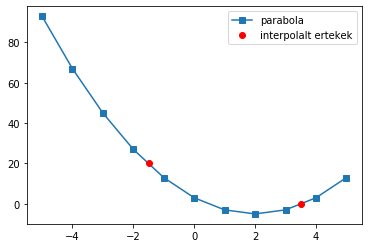

In [33]:
import matplotlib.pyplot as plt

plt.plot(x,y, 's-', label='parabola')
plt.plot(new_x, f(new_x), 'or', label = 'interpolalt ertekek')
plt.legend()

Az a módszer főleg akkor alkalmazható biztonságosan, ha az eredeti *x* értékek elég közel állnak egymáshoz, azaz a függvény folytonossága nem nagyon törik meg. 

#### Interpolálás függvény

In [31]:
temp, res = read_mapping('ntcc.csv')

A mi esetünkben az ismert értékek a hőmérséklet-ellenállás táblázat. 

In [23]:
def interpolate_temperature(resistance, tc, r):
	f = interp1d(r,tc)
	return f(resistance)

In [30]:
new_resistance = np.array([1000, 10000, 50000])  # Ohm mertekegysegben
interpolate_temperature(new_resistance, temp, res)

array([85.        , 25.        , -7.22701354])

Láthatjuk, hogy az interpolálás a beadott 3 új ellenállás értékhez 3 hőmérsékletet rendelt, 1000 Ohm - 85 $^\circ$C; 10 kOhm - 25 $^\circ$C; 50 kOhm - -7.2 $^\circ$C.

### LED-ek vezérlése

Végül már csak egy függvényt kell írnunk ami a becsült hőmérséklet alapján vezérli a LED-eket. A függvényünknek, ```lightning(temp, leds=[green, yellow, red])```, két bemenő paramétere van. Az első a becsült hőmérséklet, a második pedig egy lista, ami az inicializált LED-eket tartalmazza majd. A LED-ek sorrendje fontos, az első a zöld, a második a sárga, míg a harmadik a piros. 

A függvény belseje lényegében vezérli a LED-eket annak függvényében, hogy épp mekkora a hőmérséklet. A következő szabályt fogják a LED-ek követni:

* T < 25 $^\circ$C - nem világít egyik LED sem
* 25 $^\circ$C $\geq$ T < 28 $^\circ$C - zöld LED világít
* 28 V $\leq$ T < 32 $^\circ$C - zöld és sárga LED-ek világítanak
* T $\geq$ 32 $^\circ$C - mind a három LED világít.

In [40]:
def lightning(temp, leds=[green, yellow, red]):
	if temp < 25:
		for led in leds:
			led.off()
	elif temp < 28 and temp >= 25:
		leds[0].on()
		leds[1].off()
		leds[2].off()
	elif temp < 32 and temp >= 28:
		leds[0].on()
		leds[1].on()
		leds[2].off()
	elif temp >= 32:
		leds[0].on()
		leds[1].on()
		leds[2].on()

### A teljes kód

Már csak az eddig leírtak összetákolása van hátra kiegészítve egy kis mérési utasítással. Kommentelt sorok jelzik az új elemeket a kódban.

A python csomagok és modulok beimportálása és a segéd függvények definiálása után, elsőként beolvassuk a hőmérséklet-ellenállás táblázatot, ```tc, resistance = read_mapping('ntcc.csv')```. Ezután elindítunk egy végtelen ```while``` ciklust, amiben először kiolvassuk a mért feszültséget a thermisztoron, és az alapján meghatározzuk a thermisztor ellenállásának értékét, ```rt = voltage2resistance(mcp.voltage, v_in=3.3, r=9.82e3)```. Ha meg van az ellenállás, a táblázatból interpolálással megkapjuk a hozzá tartozó hőmérsékletet, ```t_therm = interpolate_temperature(rt, tc, resistance)```. A hőmérséklet birtokában pedig vezérelhetjük a LED-eket, ```lightning(t_therm, leds=[green, yellow, red])```. Mint fejlesztők, hogy ellenőrízni tudjuk a vezérlést, hogy jól működik-e, a képernyőre kiíratjuk a mért hőmérsékletet, így láthatjuk, hogy mekkora hőfokon kapcsolnak a LED-ek. 

```ds18b20_temperature_led_calibrated.py```:

In [ ]:
from gpiozero import MCP3008, LED
import numpy as np
from scipy.interpolate import interp1d
from temperature_functions import read_temp_raw


mcp = MCP3008(channel=7)
red = LED(21)
yellow = LED(20)
green = LED(16)


def read_mapping(name):
	data = read_temp_raw(name)
	data.pop(0)
	tc = []
	r = []
	for line in data:
		clean_data = line.strip().split(',')
		tc.append(float(clean_data[0]))
		r.append(float(clean_data[1])*1000)
	return np.array(tc), np.array(r)
	
def voltage2resistance(v_out, v_in=3.3, r=9.82e3):
	return r * v_out / (v_in - v_out)

def interpolate_temperature(resistance, tc, r):
	f = interp1d(r,tc)
	return f(resistance)
	
def lightning(temp, leds=[green, yellow, red]):
	if temp < 23:
		for led in leds:
			led.off()
	elif temp < 28 and temp >= 23:
		leds[0].on()
		leds[1].off()
		leds[2].off()
	elif temp < 32 and temp >= 28:
		leds[0].on()
		leds[1].on()
		leds[2].off()
	elif temp >= 32:
		leds[0].on()
		leds[1].on()
		leds[2].on()


tc, resistance = read_mapping('ntcc.csv')   # homerseklet-ellenallas tablazat

while True:
    # mert feszultseget ellenallasa atszamolni
	rt = voltage2resistance(mcp.voltage, v_in=3.3, r=9.82e3)
    # ellenallasertek alapjan megbecsulni a homersekletet
	t_therm = interpolate_temperature(rt, tc, resistance)
    # homerseklet alapjan vezerelni a LED-eket
	lightning(t_therm, leds=[green, yellow, red])
    # kiirni a homerseklet erteket a kepernyore
	print(t_therm)

## A projekt tesztelése

Miután összeszereltük az áramkört és a kódot is megírtuk, amit pl. ```ds18b20_temperature_led_calibrated.py``` név alatt mentettünk el, megnyithatunk a Raspberry Pi operációs rendszerén egy terminált. A terminálban a ```cd 'mappa név'``` paranccsal elnavigálunk abba a mappába, ahova a ```ds18b20_temperature_led_calibrated.py```-t elmentettük. Ott begépelve a ```python ds18b20_temperature_led_calibrated.py``` parancsot, letesztelhetjük a programunk működését. Ha minden jól megy akkor a program elindításával és a thermisztor megfogásával a képernyőre kinyomtatódik az aktuális hőmérséklet, és bizonyos szinteket elérve az aktiválja a különböző színű LED-eket a megfelelő sorrendben. 

Hibaüzenetek esetén ki kell deríteni mi lehetett a probléma, pl. elgépelés, egy modul hiányzik, sorok megfelelő behúzása, idézőjel lemaradása stb. A hibaüzenet legtöbbször segít abban, hogy melyik sorban találta a hibát és hogy mi volt az. Egy kis gyakorlással bele lehet jönni azok értelmezésébe, valamint interneten is rá lehet keresni a hibaüzenet jelentésére és annak lehetséges elhárítására.

## Mit lehet javítani/továbbfejleszteni?

* Írjuk át egy fájlba azt a függvényt amivel kinyerjük a hőmérséklet-ellenállás összefüggést és importáljuk be azt a függvényt is.
* Írjuk át a ```lightning``` függvényt úgy, hogy bemenő paraméterként megadhassuk a LED-eket vezérlő hőmérséklet limitek értékeit.

Írd meg kommentben, hogy szerinted mivel lehetne még feldobni ezt a kis programot!

## Referencia

1) https://tutorials-raspberrypi.com/mcp3008-read-out-analog-signals-on-the-raspberry-pi/

2) MCP3008 - https://gpiozero.readthedocs.io/en/stable/api_spi.html#mcp3008

3) LED objektum leírása - https://gpiozero.readthedocs.io/en/stable/api_output.html#led

4) if-else leírás - https://www.programiz.com/python-programming/if-elif-else

5) modul importálás - https://www.programiz.com/python-programming/modules

6) interpolálás - https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

7) numpy array használata - https://numpy.org/doc/stable/reference/generated/numpy.array.html

8) string műveletek - https://www.programiz.com/python-programming/string